In [1]:
print("hello world")

hello world


In [2]:
# Potato Diasease Predictions

# Potato Diasease Predictions

In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
import os
print("Current Dir ",os.getcwd())
curr_dir=os.getcwd()
train_path=os.path.join(curr_dir,"dataset","Train")
test_path=os.path.join(curr_dir,"dataset","Test")
valid_path=os.path.join(curr_dir,"dataset","Valid")

Current Dir  c:\Users\Asus\Desktop\potato


In [5]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128, 128),
    shuffle=True,
     interpolation="bilinear",
)

Found 900 files belonging to 3 classes.


In [6]:
training_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128, 128),
    shuffle=True,
     interpolation="bilinear",
)

Found 300 files belonging to 3 classes.


In [8]:

cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))

c:\Users\Asus\Desktop\potato\.conda\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:

cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:

training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 21s 625ms/step - accuracy: 0.3305 - loss: 1.9315 - val_accuracy: 0.3667 - val_loss: 1.0740
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 16s 566ms/step - accuracy: 0.4313 - loss: 1.0653 - val_accuracy: 0.3600 - val_loss: 0.9979
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 16s 567ms/step - accuracy: 0.5916 - loss: 0.8610 - val_accuracy: 0.6433 - val_loss: 0.6657
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 18s 606ms/step - accuracy: 0.7277 - loss: 0.5944 - val_accuracy: 0.8167 - val_loss: 0.4218
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 17s 570ms/step - accuracy: 0.8381 - loss: 0.3747 - val_accuracy: 0.6967 - val_loss: 0.6120
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 17s 574ms/step - accuracy: 0.7955 - loss: 0.4845 - val_accuracy: 0.8367 - val_loss: 0.3538
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 17s 601ms/step - accuracy: 0.8296 - loss: 0.3582 - val_accuracy: 0.8567 - val_loss: 0.3420
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 17s 582ms/step - accuracy: 0.9131 - loss: 0.2417 - val_accu

In [11]:
train_loss, train_acc=cnn.evaluate(training_set)
print("Training Accuracy: ",train_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 152ms/step - accuracy: 0.8775 - loss: 0.3268
Training Accuracy:  0.8922222256660461


In [12]:
val_loss,val_acc=cnn.evaluate(validation_set)
print("Validation Accuracy: ",val_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - accuracy: 0.8841 - loss: 0.3038
Validation Accuracy:  0.8833333253860474


cnn.save('trained_plant_disease_model.keras')

In [13]:
cnn.save('trained_plant_disease_model.keras')

In [14]:
training_history.history

{'accuracy': [0.36000001430511475,
  0.47333332896232605,
  0.6399999856948853,
  0.7611111402511597,
  0.8255555629730225,
  0.8088889122009277,
  0.8588888645172119,
  0.9244444370269775,
  0.9444444179534912,
  0.9511111378669739],
 'loss': [1.4440997838974,
  1.0354105234146118,
  0.7830744981765747,
  0.5406489372253418,
  0.3881995379924774,
  0.4399731457233429,
  0.32818710803985596,
  0.2000359445810318,
  0.1370980143547058,
  0.12386728823184967],
 'val_accuracy': [0.36666667461395264,
  0.36000001430511475,
  0.6433333158493042,
  0.8166666626930237,
  0.6966666579246521,
  0.8366666436195374,
  0.8566666841506958,
  0.9266666769981384,
  0.9566666483879089,
  0.8833333253860474],
 'val_loss': [1.0739985704421997,
  0.9978674054145813,
  0.6656945943832397,
  0.4218444228172302,
  0.6119566559791565,
  0.35376840829849243,
  0.34199032187461853,
  0.16184724867343903,
  0.10983927547931671,
  0.34691059589385986]}

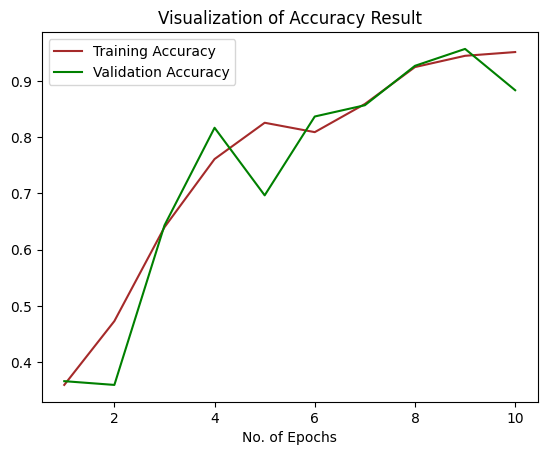

In [15]:
epochs=epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='brown',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='green',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()